# CIS 419/519 
#**Homework 3 : Logistic Regression**

In [ ]:
import pandas as pd
import numpy as np
import math
import numpy.linalg as LA
from numpy.linalg import *

### Logistic Regression

In [ ]:
class LogisticRegression:

    def __init__(self, alpha = 0.01, regLambda=0.01, regNorm=2, epsilon=0.0001, maxNumIters = 10000, initTheta = None):
        '''
        Constructor
        Arguments:
        	alpha is the learning rate
        	regLambda is the regularization parameter
        	regNorm is the type of regularization (either L1 or L2, denoted by a 1 or a 2)
        	epsilon is the convergence parameter
        	maxNumIters is the maximum number of iterations to run
          initTheta is the initial theta value. This is an optional argument
        '''
        self.alpha = alpha
        self.regLambda = regLambda
        self.regNorm = regNorm
        self.epsilon = epsilon
        self.maxNumIters = maxNumIters
        self.initTheta = initTheta
        self.sigma = 1    # the default value of sigmoid function
        self.theta = []    # the result of the gradient theta
        self.pre = []    # the 
    

    def computeCost(self, theta, X, y, regLambda):
        '''
        Computes the objective function
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-by-1 numpy matrix
            regLambda is the scalar regularization constant
        Returns:
            a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
        '''
        n,d = X.shape    # d, degree of regression
        yhat = self.sigmoid(X*theta)    # hypothesis y
        if self.regNorm == 2:
            cost = -np.log(yhat).T*y-np.log((np.ones((n,1))-yhat)).T*(np.ones((n,1))-y)- regLambda*theta[1:d+1].T*theta[1:d+1]    # compute cost
        elif self.regNorm == 1:
            cost = -np.log(yhat).T*y-np.log((np.ones((n,1))-yhat)).T*(np.ones((n,1))-y)- regLambda*np.sum(np.absolute(theta[1:d+1]))  # compute cost
        cost_scalar = cost.tolist()[0][0]    # convert matrix to scalar
        return cost_scalar

    
    def computeGradient(self, theta, X, y, regLambda):
        '''
        Computes the gradient of the objective function
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-by-1 numpy matrix
            regLambda is the scalar regularization constant
        Returns:
            the gradient, an d-dimensional vector
        '''
        n,d = X.shape
        for i in range(self.maxNumIters):

            yhat = self.sigmoid(X*theta)    # hypothesis y
            old_theta = theta.copy()

            theta_0 = theta-self.alpha*np.ones((1,n))*(yhat-y)

            if self.regNorm == 2:
                theta_remain = theta-self.alpha*X.T*(yhat-y)-self.alpha*regLambda*theta
            elif self.regNorm == 1:
                theta_remain = theta-self.alpha*X.T*(yhat-y)-self.alpha*regLambda

            theta = np.r_[theta_0[0],theta_remain[1:d+1]]

            eps = LA.norm(old_theta-theta)
            if eps < self.epsilon:
                break
        return theta

    def fit(self, X, y):
        '''
        Trains the model
        Arguments:
            X is a n-by-d Pandas data frame
            y is an n-by-1 Pandas data frame
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before fit() is called.
        '''
        n= len(y)
        X = X.to_numpy()
        X = np.c_[np.ones((n,1)),X]    # add a column of 1 to the matrix
        y = y.to_numpy()    # transfer y to numpy
        n,d = X.shape
        y = y.reshape(n,1)

        # initialize theta
        if self.initTheta is None:
            self.initTheta = np.matrix(np.zeros((d,1)))

        self.theta = self.computeGradient(self.initTheta,X,y,self.regLambda)

    def predict(self, X):
        '''
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d Pandas data frame
        Returns:
            an n-by-1 dimensional Pandas data frame of the predictions
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before predict() is called.
        '''

        X_np = X.to_numpy()
        n,d = X.shape
        X_np_1 = np.c_[np.ones((n,1)),X_np]    # Add a row of ones for the bias
        pre_y = self.sigmoid(X_np_1*self.theta)    # the predict data
        self.pre = pd.DataFrame(pre_y)    # convert the ndarray to dataframe
        result = self.predict_proba(X)    # predict the class probability for each instance in X

        return result


    def predict_proba(self, X):
        '''
        Used the model to predict the class probability for each instance in X
        Arguments:
            X is a n-by-d Pandas data frame
        Returns:
            an n-by-1 Pandas data frame of the class probabilities
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before predict_proba() is called.
        '''
        def threshold(x):
            """
            This function use to set a threshold for predict value
            Inputs:
                x -- a numeric number
            Outputs:
                0 -- if the hypothesis y is lower than 0.5
                1 -- if the hypothesis y is higher or equal to 0.5
            """
            if x >= 0.5:
                return 1
            elif x < 0.5:
                return 0

        X = X.to_numpy()
        n,d = X.shape
        X = np.c_[np.ones((n,1)),X]    # add one row of ones for the bias
        yhat = self.pre    # returns a n-by-1 Pandas dataframe
        n = len(yhat)
        yhat.iloc[:,0] = yhat.iloc[:,0].apply(lambda x:threshold(x))    # replace the original dataframe to 0-1
        return yhat


    def sigmoid(self, Z):
        '''
        Computes the sigmoid function 1/(1+exp(-z))
        '''
        sigma = 1/(1+np.exp(-Z))

        return sigma

# Test Logistic Regression 1

In [ ]:
# Test script for training a logistic regressiom model
#
# This code should run successfully without changes if your implementation is correct
#
from numpy import loadtxt, ones, zeros, where
import numpy as np
from pylab import plot,legend,show,where,scatter,xlabel, ylabel,linspace,contour,title
import matplotlib.pyplot as plt

def test_logreg1():
    # load the data
    filepath = "http://www.seas.upenn.edu/~cis519/spring2020/data/hw3-data1.csv"
    df = pd.read_csv(filepath, header=None)

    X = df[df.columns[0:2]]
    y = df[df.columns[2]]

    n,d = X.shape

    # # Standardize features
    from sklearn.preprocessing import StandardScaler
    standardizer = StandardScaler()
    Xstandardized = pd.DataFrame(standardizer.fit_transform(X))  # compute mean and stdev on training set for standardization
    
    # train logistic regression
    logregModel = LogisticRegression(regLambda = 0.00000001)
    logregModel.fit(Xstandardized,y)
    
    # Plot the decision boundary
    h = .02  # step size in the mesh
    x_min = X[X.columns[0]].min() - .5
    x_max = X[X.columns[0]].max() + .5
    y_min = X[X.columns[1]].min() - .5
    y_max = X[X.columns[1]].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    allPoints = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
    allPoints = pd.DataFrame(standardizer.transform(allPoints))
    Z = logregModel.predict(allPoints)
    Z = np.asmatrix(Z.to_numpy())

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot the training points
    plt.scatter(X[X.columns[0]], X[X.columns[1]], c=y.ravel(), edgecolors='k', cmap=plt.cm.Paired)
    
    # Configure the plot display
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    plt.show()

test_logreg1()

# Map Feature

In [ ]:
def mapFeature(X, column1, column2, maxPower = 6):
    '''
    Maps the two specified input features to quadratic features. Does not standardize any features.
        
    Returns a new feature array with d features, comprising of
        X1, X2, X1 ** 2, X2 ** 2, X1*X2, X1*X2 ** 2, ... up to the maxPower polynomial
        
    Arguments:
        X is an n-by-d Pandas data frame, where d > 2
        column1 is the string specifying the column name corresponding to feature X1
        column2 is the string specifying the column name corresponding to feature X2
    Returns:
        an n-by-d2 Pandas data frame, where each row represents the original features augmented with the new features of the corresponding instance
    '''
    X1 = X[column1]    # feature 1
    X2 = X[column2]    # feature 2
    n = len(X1)
    X1_expand = X1.to_numpy()    # convert dataframe to numpy
    X2_expand = X2.to_numpy()    # convert dataframe to numpy
    poly = np.ones((n,1))

    for k in range(1,maxPower+1):
        for i in range(0,k+1):
            X_col = (X1_expand**(k-i))*(X2_expand**i)    # compute the new feature
            poly = np.c_[poly,X_col]    # add the new feature to the current feature
    
    return pd.DataFrame(poly)

# Test Logistic Regression 2

0
0.06197290817232215
1
0.034953055619340034
2
0.023377150464241936
3
0.01677783244109321
4
0.01249424105466801
5
0.009496052092217155
6
0.007290944553616896
7
0.005611155841506843
8
0.004297573257936449
9
0.0032493328318636827
10
0.0023992580719323087
11
0.0017008284899659998
12
0.00112079275810828
13
0.0006347535271160609
14
0.00022441108150417222
15
0.00012422117042376613
16
0.00042200827243021877
17
0.0006775108020988796
18
0.0008975582556161044
19
0.0010876596650319925
20
0.0012523029811433162
21
0.0013951768769544515
22
0.0015193374521302871
23
0.0016273351600446517
24
0.0017213125912505234
25
0.0018030806158009227
26
0.0018741782579922983
27
0.0019359202045521329
28
0.001989434814198887
29
0.002035694762099638
30
0.0020755419222098226
31
0.0021097077056211333
32
0.0021388297866948847
33
0.002163465938743059
34
0.002184105540052883
35
0.0022011791915375056
36
0.002215066793787912
37
0.0022261043612203935
38
0.002234589794724684
39
0.002240787791897958
40
0.002244934039218549
41
0

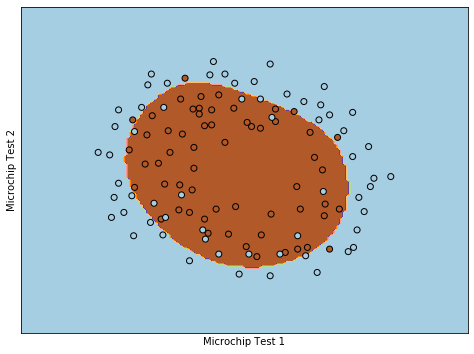

0 1


In [141]:
from numpy import loadtxt, ones, zeros, where
import numpy as np
from pylab import plot,legend,show,where,scatter,xlabel, ylabel,linspace,contour,title
import matplotlib.pyplot as plt

def test_logreg2():

    polyPower = 6

    # load the data
    filepath = "http://www.seas.upenn.edu/~cis519/spring2020/data/hw3-data2.csv"
    df = pd.read_csv(filepath, header=None)

    X = df[df.columns[0:2]]
    y = df[df.columns[2]]

    n,d = X.shape

    # map features into a higher dimensional feature space
    Xaug = mapFeature(X.copy(), X.columns[0], X.columns[1], polyPower)

    # # Standardize features
    from sklearn.preprocessing import StandardScaler
    standardizer = StandardScaler()
    Xaug = pd.DataFrame(standardizer.fit_transform(Xaug))  # compute mean and stdev on training set for standardization
    
    # train logistic regression
    logregModel = LogisticRegressionAdagrad(regLambda = 0.00000001, regNorm=2)
    logregModel.fit(Xaug,y)
    
    # Plot the decision boundary
    h = .02  # step size in the mesh
    x_min = X[X.columns[0]].min() - .5
    x_max = X[X.columns[0]].max() + .5
    y_min = X[X.columns[1]].min() - .5
    y_max = X[X.columns[1]].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    allPoints = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
    allPoints = mapFeature(allPoints, allPoints.columns[0], allPoints.columns[1], polyPower)
    allPoints = pd.DataFrame(standardizer.transform(allPoints))
    Xaug = pd.DataFrame(standardizer.fit_transform(Xaug))  # standardize data
    
    Z = logregModel.predict(allPoints)
    Z = np.asmatrix(Z.to_numpy())

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot the training points
    plt.scatter(X[X.columns[0]], X[X.columns[1]], c=y.ravel(), edgecolors='k', cmap=plt.cm.Paired)
    
    # Configure the plot display
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    plt.show()


    print(str(Z.min()) + " " + str(Z.max()))

test_logreg2()

# Logistic Regression with Adagrad

In [140]:
import random

class LogisticRegressionAdagrad:

    def __init__(self, alpha = 0.01, regLambda=0.01, regNorm=2, epsilon=1E-4, maxNumIters = 400, initTheta = None):
        '''
        Constructor
        Arguments:
        	alpha is the learning rate
        	regLambda is the regularization parameter
        	regNorm is the type of regularization (either L1 or L2, denoted by a 1 or a 2)
        	epsilon is the convergence parameter
        	maxNumIters is the maximum number of iterations to run
          initTheta is the initial theta value. This is an optional argument
        '''
        self.alpha = alpha
        self.regLambda = regLambda
        self.regNorm = regNorm
        self.epsilon = epsilon
        self.maxNumIters = maxNumIters
        self.initTheta = initTheta
        self.sigma = 1    # the default value of sigmoid function
        self.theta = []    # the result of the gradient theta
        self.pre = []    # the predict one
        self.ksi = 1E-3    # small constant to prevent dividing by zero errors

    def computeCost(self, theta, X, y, regLambda):
        '''
        Computes the objective function
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-by-1 numpy matrix
            regLambda is the scalar regularization constant
        Returns:
            a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
            '''
        n,d = X.shape    # d, degree of regression
        yhat = self.sigmoid(X*theta)    # hypothesis y
        if self.regNorm == 2:
            cost = -np.log(yhat).T*y-np.log((np.ones((n,1))-yhat)).T*(np.ones((n,1))-y)- regLambda*theta[1:d+1].T*theta[1:d+1]    # compute cost
        elif self.regNorm == 1:
            cost = -np.log(yhat).T*y-np.log((np.ones((n,1))-yhat)).T*(np.ones((n,1))-y)- regLambda*np.sum(np.absolute(theta[1:d+1]))  # compute cost
        cost_scalar = cost.tolist()[0][0]    # convert matrix to scalar
        return cost_scalar

    
    def computeGradient(self, theta, X, y, regLambda):
        '''
        Computes the gradient of the objective function
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-by-1 numpy matrix
            regLambda is the scalar regularization constant
        Returns:
            the gradient, an d-dimensional vector
        '''
        # random.seed(0)
        n,d = X.shape

        # randomly shuffle the dataset
        idx = list(range(0,n))    # row index of the dataframe
        random.shuffle(idx)    # get the shuffled index of the dataframe

        # get the training data after shuffle
        X_backup = X.copy()
        y_backup = y.copy()
        Shuffle_X = X_backup[idx,:]    # X after shuffle
        Shuffle_y = y_backup[idx,:]    # y after shuffle

        X = Shuffle_X.copy()
        y = Shuffle_y.copy()
        G = np.zeros(d)

        # print(X)

        for k in range(self.maxNumIters):
            # yhat = self.sigmoid(X*theta)
            # old_theta = theta.copy()
            print(k)
            for i in range(n):
                yhat = self.sigmoid(X*theta)
                old_theta = theta.copy()
                for j in range(d):

                    if j == 0:
                        G[j] += ((yhat[i,0]-y[i,0])*X[i,j])**2
                    else:
                        if self.regNorm == 2:
                            G[j] += ((yhat[i,0]-y[i,0])*X[i,j]+regLambda*theta[j,0])**2
                        elif self.regNorm == 1:
                            G[j]+=((yhat[i,0]-y[i,0])*X[i,j]+regLambda)**2

                    alpha = self.alpha/(np.sqrt(G[j])+self.ksi)
                    if self.regNorm == 2:
                        if j == 0:
                            theta[j,0]=theta[j,0]-alpha*(yhat[i,0]-y[i,0])*X[i,j]
                            # G[0] = G[0] + ((yhat[i,0]-y[i,0])*X[i,j])**2
                            # print(((yhat[i,0]-y[i,0])*X[i,j])**2)
                        else:
                            theta[j,0]=theta[j,0]-alpha*(yhat[i,0]-y[i,0])*X[i,j]-alpha*regLambda*theta[j,0]
                            # G[j] = G[j]+((yhat[i,0]-y[i,0])*X[i,j]+regLambda*theta[j,0])**2
                    elif self.regNorm == 1:
                        if j == 0:
                            theta[j,0]=theta[j,0]-alpha*(yhat[i,0]-y[i,0])*X[i,j]
                            # G[0] = G[0] + ((yhat[i,0]-y[i,0])*X[i,j])**2
                        else:
                            theta[j,0]=theta[j,0]-alpha*(yhat[i,0]-y[i,0])*X[i,j]-alpha*regLambda
                            # G[j] = G[j]+ ((yhat[i,0]-y[i,0])*X[i,j]+regLambda)**2

            # convergent test
            bool_converged = self.hasConverged(old_theta,theta,self.epsilon,X,y,regLambda)

            if bool_converged == 1:
                break

        # print(theta)
            
        return theta

    def hasConverged(self,oldtheta,newtheta,epsilon,X,y,regLambda):
        """
        Detect the convergence based on the cost
        Returns:
        a boolean, whether the cost has converge
        """
        old_cost = self.computeCost(oldtheta,X,y,regLambda)
        new_cost = self.computeCost(newtheta,X,y,regLambda)
        d_cost = abs(old_cost-new_cost)    # compute the difference between old cost and new cost

        print(d_cost)

        if d_cost<epsilon:
            bool_converged = 1
        else:
            bool_converged =0

        return bool_converged

    def fit(self, X, y):
        '''
        Trains the model
        Arguments:
            X is a n-by-d Pandas data frame
            y is an n-by-1 Pandas data frame
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before fit() is called.
        '''
        n= len(y)
        # print(X)
        X = X.to_numpy()
        # print(X)
        X = np.c_[np.ones((n,1)),X]    # add a column of 1 to the matrix
        y = y.to_numpy()    # transfer y to numpy
        n,d = X.shape
        y = y.reshape(n,1)

        # initialize theta
        if self.initTheta is None:
            self.initTheta = np.matrix(np.zeros((d,1)))

        self.theta = self.computeGradient(self.initTheta,X,y,self.regLambda)


    def predict(self, X):
        '''
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d Pandas data frame
        Returns:
            an n-by-1 dimensional Pandas data frame of the predictions
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before predict() is called.
        '''

        X_np = X.to_numpy()
        n,d = X.shape
        X_np_1 = np.c_[np.ones((n,1)),X_np]    # Add a row of ones for the bias
        pre_y = self.sigmoid(X_np_1*self.theta)    # the predict data
        self.pre = pd.DataFrame(pre_y)    # convert the ndarray to dataframe
        result = self.predict_proba(X)    # predict the class probability for each instance in X

        return result


    def predict_proba(self, X):
        '''
        Used the model to predict the class probability for each instance in X
        Arguments:
            X is a n-by-d Pandas data frame
        Returns:
            an n-by-1 Pandas data frame of the class probabilities
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before predict_proba() is called.
        '''
        def threshold(x):
            """
            This function use to set a threshold for predict value
            Inputs:
                x -- a numeric number
            Outputs:
                0 -- if the hypothesis y is lower than 0.5
                1 -- if the hypothesis y is higher or equal to 0.5
            """
            if x >= 0.5:
                return 1
            elif x < 0.5:
                return 0

        X = X.to_numpy()
        n,d = X.shape
        X = np.c_[np.ones((n,1)),X]    # add one row of ones for the bias
        yhat = self.pre    # returns a n-by-1 Pandas dataframe
        n = len(yhat)
        yhat.iloc[:,0] = yhat.iloc[:,0].apply(lambda x:threshold(x))    # replace the original dataframe to 0-1
        return yhat


    def sigmoid(self, Z):
        '''
        Computes the sigmoid function 1/(1+exp(-z))
        '''
        sigma = 1/(1+np.exp(-Z))

        return sigma